In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('py/') 

from functions import initialize, get_points_within_target_region, df2gdf, plot_map
from preprocess import preprocess_data
from map_matching import map_match_csv2gpx


#### Initialize system:
- remove old data
- create necessary directories

In [2]:
initialize()

Cleaning dirs: input/ and output/ 


#### Remove input points outside of target boundary

- ananymize ap_id column
- clip points within boundary

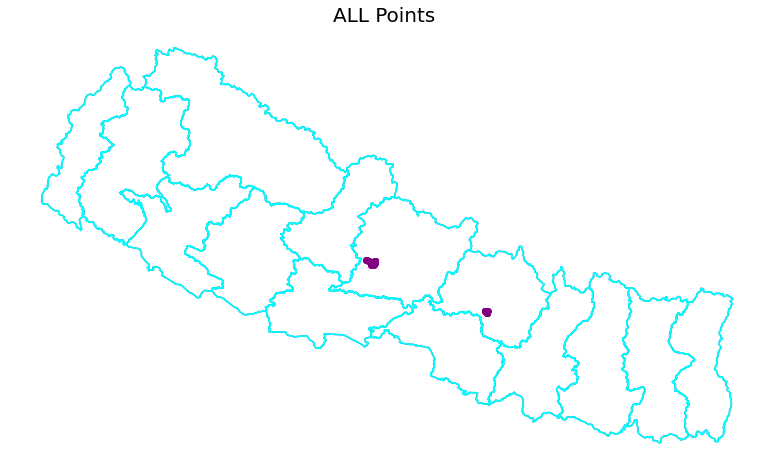

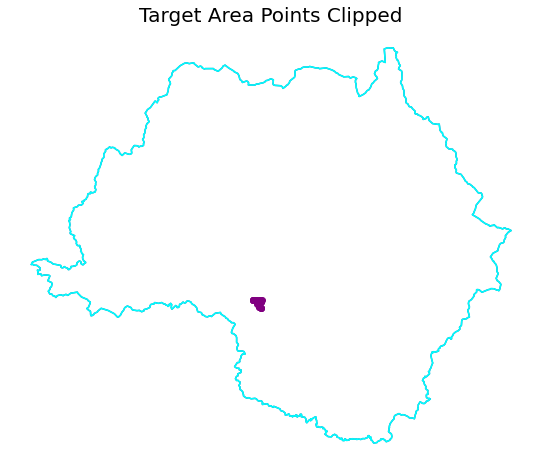

In [3]:
gps_csv = 'raw_data/gps_probe_Nepal.csv'
gdf_probe_clipped, gdf_target = get_points_within_target_region (gps_csv, display_plot = True)
#gdf_probe_clipped.head()

#### Preprocess input points

In [4]:
# 1. cleaning data & applying sampling
df_sample = preprocess_data()
df_sample.head(2)

,ap_id,timestamp,latitude,longitude
0,8542943494252,2019-07-01 6:07:10,27.71509,85.310335
1,8542943494252,2019-07-01 6:17:31,27.71509,85.310335


#### map matching with osm roads using graphhopper

In [5]:
# map matching
df_mapped_route = map_match_csv2gpx(df_sample)

1  csv file prepared ->  /home/bidur/map_match_gps_data/input/csv/

completed:  java -jar matching-web/target/graphhopper-map-matching-web-1.0-SNAPSHOT.jar import map-data/nepal-latest.osm.pbf
Current Working Directory  /home/bidur/map_match_gps_data/map-matching-master

completed:  java -jar matching-web/target/graphhopper-map-matching-web-1.0-SNAPSHOT.jar match matching-web/src/test/resources/target/*.gpx

convert_resgpx2csv -> /home/bidur/map_match_gps_data/output/res_csv/
Matched gpx -> /home/bidur/map_match_gps_data/map-matching-master/matching-web/src/test/resources/target/*.res.gpx
 completed for 8542943494252


 Map Matching and route generation completed
/home/bidur/map_match_gps_data/output/5_final_csv_4_mobmap.csv


In [6]:
df_mapped_route.head()

,id,ap_id,latitude,longitude,timestamp
0,0,8542943494252,27.715090,85.310335,2019-07-01 06:07:10.000000
1,1,8542943494252,27.715090,85.310335,2019-07-01 06:17:31.000000
2,2,8542943494252,27.715813,85.310007,2019-07-01 06:21:10.000000
3,3,8542943494252,27.715884,85.310018,2019-01-07 06:21:39.000000
4,4,8542943494252,27.716409,85.310051,2019-01-07 06:22:08.000000


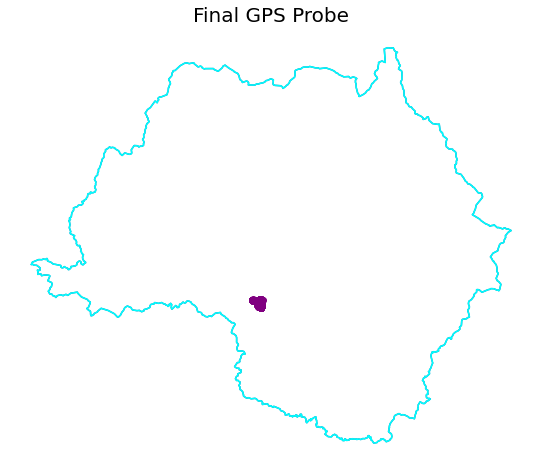

In [7]:
gdf_mapped = df2gdf(df_mapped_route)
plot_map(gdf_mapped, gdf_target, "Final GPS Probe") 